<a href="https://colab.research.google.com/github/Lin8823/Lin/blob/main/Heart%20Disease/NN_model/%E5%BF%83%E8%A1%80%E7%AE%A1%E7%96%BE%E7%97%85%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Input, Dense, SimpleRNN, RNN
from keras.layers import LSTM
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/Lin8823/Lin/main/Data/heart.csv

--2022-01-10 06:46:12--  https://raw.githubusercontent.com/Lin8823/Lin/main/Data/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0s      

2022-01-10 06:46:12 (72.2 MB/s) - ‘heart.csv’ saved [11328/11328]



In [ ]:
heart = pd.read_csv("heart.csv", encoding="utf-8")
MinMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1)) #使用Min-Max Normalization將data標準化至0-1間
MinMax_data = MinMaxScaler.fit_transform(heart)
heart = pd.DataFrame(MinMax_data, columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


###將患有與未患有心血管疾病的資料分割

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

heart_disease = heart.iloc[0:165]
non_disease = heart.iloc[165:]
feature_heart_disease = heart_disease.drop("num",axis=1)
feature_non_disease = non_disease.drop("num",axis=1)
target_heart = heart["num"]
ct = ColumnTransformer(transformers=[('encode', OneHotEncoder(), [0])], remainder='passthrough')
y = np.array(ct.fit_transform(pd.DataFrame(target_heart))) #[0,1]代表患有心血管疾病、[1,0]則無
target_heart_disease = y[0:165]
target_non_disease = y[165:]

###將目標變數切割

In [ ]:
def plot_the_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

Epoch 1/30
41/41 [==============================] - 1s 2ms/step - loss: 0.6226 - binary_accuracy: 0.6901
Epoch 2/30
41/41 [==============================] - 0s 2ms/step - loss: 0.5377 - binary_accuracy: 0.8099
Epoch 3/30
41/41 [==============================] - 0s 1ms/step - loss: 0.5039 - binary_accuracy: 0.8099
Epoch 4/30
41/41 [==============================] - 0s 2ms/step - loss: 0.4715 - binary_accuracy: 0.8017
Epoch 5/30
41/41 [==============================] - 0s 1ms/step - loss: 0.4551 - binary_accuracy: 0.8099
Epoch 6/30
41/41 [==============================] - 0s 1ms/step - loss: 0.4463 - binary_accuracy: 0.8306
Epoch 7/30
41/41 [==============================] - 0s 2ms/step - loss: 0.4116 - binary_accuracy: 0.8306
Epoch 8/30
41/41 [==============================] - 0s 2ms/step - loss: 0.4078 - binary_accuracy: 0.8264
Epoch 9/30
41/41 [==============================] - 0s 2ms/step - loss: 0.4033 - binary_accuracy: 0.8264
Epoch 10/30
41/41 [==============================] - 0s

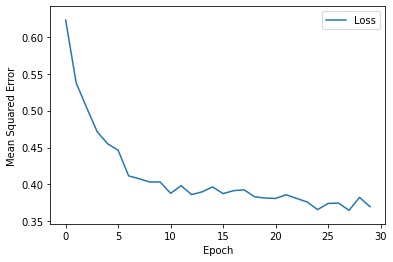

2/2 [==============================] - 0s 9ms/step - loss: 0.3753 - binary_accuracy: 0.8361
Test loss: 0.37533822655677795
Test accuracy: 0.8360655903816223
Epoch 1/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6883 - binary_accuracy: 0.5599
Epoch 2/30
41/41 [==============================] - 0s 1ms/step - loss: 0.6761 - binary_accuracy: 0.5868
Epoch 3/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6530 - binary_accuracy: 0.6694
Epoch 4/30
41/41 [==============================] - 0s 1ms/step - loss: 0.6171 - binary_accuracy: 0.6818
Epoch 5/30
41/41 [==============================] - 0s 1ms/step - loss: 0.5745 - binary_accuracy: 0.7273
Epoch 6/30
41/41 [==============================] - 0s 1ms/step - loss: 0.5344 - binary_accuracy: 0.7521
Epoch 7/30
41/41 [==============================] - 0s 1ms/step - loss: 0.5044 - binary_accuracy: 0.7562
Epoch 8/30
41/41 [==============================] - 0s 2ms/step - loss: 0.4751 - binary_accuracy: 0.7893
Epo

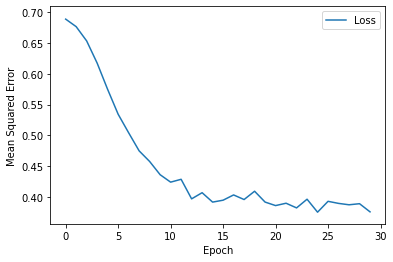

2/2 [==============================] - 0s 6ms/step - loss: 0.3259 - binary_accuracy: 0.8525
Test loss: 0.3259255588054657
Test accuracy: 0.8524590134620667
Epoch 1/30
41/41 [==============================] - 0s 1ms/step - loss: 0.7111 - binary_accuracy: 0.5455
Epoch 2/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6527 - binary_accuracy: 0.6033
Epoch 3/30
41/41 [==============================] - 0s 1ms/step - loss: 0.6200 - binary_accuracy: 0.6488
Epoch 4/30
41/41 [==============================] - 0s 1ms/step - loss: 0.5799 - binary_accuracy: 0.7066
Epoch 5/30
41/41 [==============================] - 0s 2ms/step - loss: 0.5255 - binary_accuracy: 0.7893
Epoch 6/30
41/41 [==============================] - 0s 1ms/step - loss: 0.4859 - binary_accuracy: 0.7769
Epoch 7/30
41/41 [==============================] - 0s 1ms/step - loss: 0.4613 - binary_accuracy: 0.8140
Epoch 8/30
41/41 [==============================] - 0s 1ms/step - loss: 0.4385 - binary_accuracy: 0.8058
Epoc

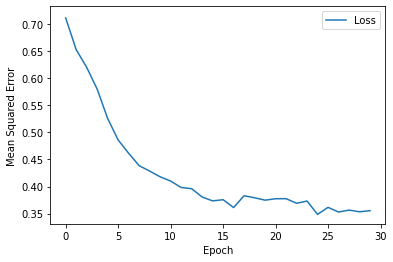

2/2 [==============================] - 0s 7ms/step - loss: 0.4540 - binary_accuracy: 0.8033
Test loss: 0.4539540112018585
Test accuracy: 0.8032786846160889
Epoch 1/30
41/41 [==============================] - 0s 1ms/step - loss: 0.6919 - binary_accuracy: 0.4321
Epoch 2/30
41/41 [==============================] - 0s 1ms/step - loss: 0.6801 - binary_accuracy: 0.5432
Epoch 3/30
41/41 [==============================] - 0s 1ms/step - loss: 0.6670 - binary_accuracy: 0.5432
Epoch 4/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6375 - binary_accuracy: 0.6420
Epoch 5/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6059 - binary_accuracy: 0.7037
Epoch 6/30
41/41 [==============================] - 0s 1ms/step - loss: 0.5557 - binary_accuracy: 0.7613
Epoch 7/30
41/41 [==============================] - 0s 1ms/step - loss: 0.5142 - binary_accuracy: 0.7778
Epoch 8/30
41/41 [==============================] - 0s 1ms/step - loss: 0.4874 - binary_accuracy: 0.7984
Epoc

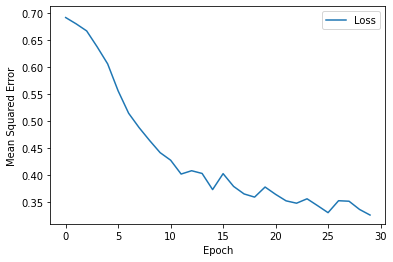

2/2 [==============================] - 0s 8ms/step - loss: 0.3530 - binary_accuracy: 0.8167
Test loss: 0.3529933989048004
Test accuracy: 0.8166666626930237
Epoch 1/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6941 - binary_accuracy: 0.5802
Epoch 2/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6615 - binary_accuracy: 0.6543
Epoch 3/30
41/41 [==============================] - 0s 2ms/step - loss: 0.6288 - binary_accuracy: 0.7160
Epoch 4/30
41/41 [==============================] - 0s 1ms/step - loss: 0.5834 - binary_accuracy: 0.7366
Epoch 5/30
41/41 [==============================] - 0s 2ms/step - loss: 0.5263 - binary_accuracy: 0.7695
Epoch 6/30
41/41 [==============================] - 0s 1ms/step - loss: 0.4554 - binary_accuracy: 0.7860
Epoch 7/30
41/41 [==============================] - 0s 2ms/step - loss: 0.4215 - binary_accuracy: 0.7819
Epoch 8/30
41/41 [==============================] - 0s 2ms/step - loss: 0.3811 - binary_accuracy: 0.8354
Epoc

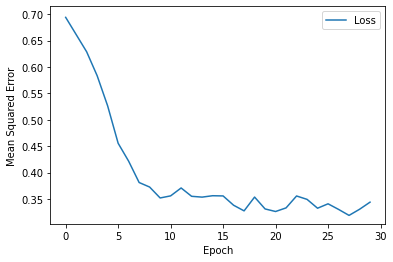

2/2 [==============================] - 0s 6ms/step - loss: 0.5858 - binary_accuracy: 0.7500
Test loss: 0.5858237147331238
Test accuracy: 0.75
[0.8360655903816223, 0.8524590134620667, 0.8032786846160889, 0.8166666626930237, 0.75]


0.8116939902305603

In [ ]:
test_score_list = []
for disease_index, non_disease_index in zip(kf.split(feature_heart_disease), kf.split(feature_non_disease)):
  heart_disease_train, heart_disease_test = feature_heart_disease.iloc[disease_index[0]], feature_heart_disease.iloc[disease_index[1]]
  heart_disease1_train, heart_disease1_test = target_heart_disease[disease_index[0]], target_heart_disease[disease_index[1]]
  non_disease_train, non_disease_test = feature_non_disease.iloc[non_disease_index[0]], feature_non_disease.iloc[non_disease_index[1]]
  non_disease1_train, non_disease1_test = target_non_disease[non_disease_index[0]], target_non_disease[non_disease_index[1]]

  heart_train = pd.concat([heart_disease_train, non_disease_train])
  heart_test = pd.concat([heart_disease_test, non_disease_test])
  heart1_train = np.vstack([heart_disease1_train,non_disease1_train])
  heart1_test = np.vstack([heart_disease1_test,non_disease1_test])

  # print("heart_train：\t",heart_train, "\nheart1_train：\t",heart1_train, "\nheart_test：\t",heart_test, "\nheart1_test：\t",heart1_test)

  inputs = keras.Input(shape=(13))
  dense = layers.Dense(8, activation="relu")(inputs) 
  x = layers.Dense(5, activation="relu")(dense)
  outputs = layers.Dense(2,activation="softmax")(x) 
  model = keras.Model(inputs=inputs, outputs=outputs, name="NN")
  model.compile(
      loss=keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.SGD(learning_rate=0.05, name="SGD"),
      metrics=["binary_accuracy"]
  )

  history = model.fit(heart_train, heart1_train, batch_size=6, epochs=30)
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  mse = hist["loss"]
  plot_the_loss_curve(epochs, mse)
  test_scores = model.evaluate(heart_test, heart1_test)
  test_score_list.append(test_scores[1])
  print("Test loss:", test_scores[0])
  print("Test accuracy:", test_scores[1])
print(test_score_list)
np.mean(test_score_list)

In [ ]:
model.predict(heart_test)

array([[0.07043408, 0.9295659 ],
       [0.06402196, 0.93597806],
       [0.0147434 , 0.9852566 ],
       [0.02668557, 0.97331446],
       [0.02134977, 0.9786502 ],
       [0.09929469, 0.9007053 ],
       [0.5958206 , 0.40417948],
       [0.97825944, 0.0217405 ],
       [0.01354622, 0.98645383],
       [0.30577806, 0.694222  ],
       [0.01429765, 0.98570234],
       [0.16144754, 0.8385525 ],
       [0.02443457, 0.97556543],
       [0.2915198 , 0.7084802 ],
       [0.02552539, 0.9744746 ],
       [0.00541596, 0.994584  ],
       [0.02046582, 0.97953415],
       [0.03573718, 0.9642628 ],
       [0.53620917, 0.46379083],
       [0.11624195, 0.883758  ],
       [0.26303527, 0.73696476],
       [0.0740309 , 0.9259691 ],
       [0.01710395, 0.98289603],
       [0.12440036, 0.8755996 ],
       [0.02002544, 0.97997457],
       [0.03654772, 0.96345234],
       [0.98048234, 0.0195177 ],
       [0.22964703, 0.770353  ],
       [0.2459629 , 0.75403714],
       [0.01865535, 0.9813447 ],
       [0.

In [ ]:
heart_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,0.270833,1.0,0.333333,0.245283,0.385845,0.0,0.5,0.694656,0.0,0.000000,1.0,0.00,0.666667
133,0.250000,1.0,0.333333,0.150943,0.248858,0.0,0.5,0.625954,0.0,0.000000,1.0,0.00,0.666667
134,0.250000,0.0,0.333333,0.301887,0.410959,0.0,0.5,0.702290,0.0,0.000000,1.0,0.00,0.666667
135,0.416667,0.0,0.000000,0.339623,0.326484,0.0,0.5,0.702290,0.0,0.000000,1.0,0.00,0.666667
136,0.645833,0.0,0.666667,0.245283,0.118721,1.0,0.5,0.190840,0.0,0.000000,1.0,0.00,0.666667
137,0.687500,1.0,0.333333,0.320755,0.187215,1.0,0.0,0.526718,0.0,0.000000,1.0,0.00,0.666667
138,0.583333,1.0,0.000000,0.150943,0.171233,0.0,0.5,0.419847,1.0,0.241935,0.5,0.00,0.333333
139,0.729167,1.0,0.000000,0.320755,0.312785,0.0,0.5,0.259542,1.0,0.032258,0.5,0.25,1.000000
140,0.458333,0.0,0.666667,0.245283,0.385845,0.0,0.0,0.656489,0.0,0.096774,1.0,0.00,0.666667
141,0.291667,1.0,0.000000,0.198113,0.404110,0.0,0.5,0.839695,0.0,0.193548,0.5,0.00,0.666667


###使用平均、中位數做資料預測

In [ ]:
model.predict([[heart['age'].mean(), heart['sex'].median(), heart['cp'].mean(), heart['trestbps'].mean(), heart['chol'].mean(), 
               heart['fbs'].median(), heart['restecg'].median(), heart['thalach'].mean(), heart['exang'].median(), heart['oldpeak'].mean(),
               heart['slope'].median(), heart['ca'].median(), heart['thal'].median()]])

array([[0.41059422, 0.5894058 ]], dtype=float32)